# Exercises in Clustering

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# Load the data
data = pd.read_csv('Ch5_bike_station_locations.csv')
X = data[['latitude', 'longitude']]

## Exercise 1

In this exercise, we will use a bike sharing dataset. The dataset contains coordinates of bike sharing stations in New York given as longitude and latitude values.

The dataset is am example dataset from the book ["Introduction to R for Business Intelligence"](https://jgendron.github.io/com.packtpub.intro.r.bi/), Packt Publishing Ltd., 2016, by Jay Gendron. The dataset is downloadable from Github [here](https://github.com/jgendron/com.packtpub.intro.r.bi/tree/master/Chapter5-ClusteringAnalysis/data), but is also available on Moodle as "Ch5_bike_station_locations.csv".

Answer the following questions:
1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.
2. Visualize the K-Means clustering result for the best K.
3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.
4. Generate this number of clusters with Agglomerative clustering and visualize the clustering.
5. Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.)
6. Visual the final DBSCAN clustering you decided upon in 5.
7. Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.

In [3]:
data

,latitude,longitude
0,38.956590,-76.993437
1,38.905218,-77.001496
2,38.980858,-77.054722
3,38.902925,-76.929915
4,38.949498,-77.093620
...,...,...
239,38.965620,-77.060719
240,38.880730,-76.993533
241,38.924690,-76.978702
242,38.869303,-76.968034


1. Apply K-Means clustering to the dataset. Try out different values for K and use the Elbow method to find the best (or a sensible) K.

Applying k means using 3 clusters to the dataset

c:\Users\victo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Den angivne fil blev ikke fundet
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\victo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\victo\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\victo\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\victo\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(exec

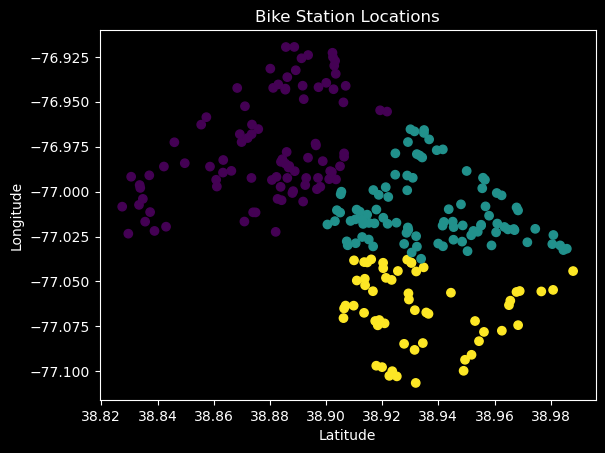

In [4]:
# Apply k means clustering to the data

from sklearn.cluster import KMeans

# Create a kmeans model on our data, using 3 clusters
kmeans_model = KMeans(n_clusters=3, random_state=1)
kmeans_model.fit(data[['latitude', 'longitude']])
data['cluster'] = kmeans_model.labels_

# Plot the clusters
plt.scatter(data['latitude'], data['longitude'], c=data['cluster'], cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Bike Station Locations')
plt.show()



2. Visualize the K-Means clustering result for the best K.

Using the elbow method to find a reasonable amount of clusters

c:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

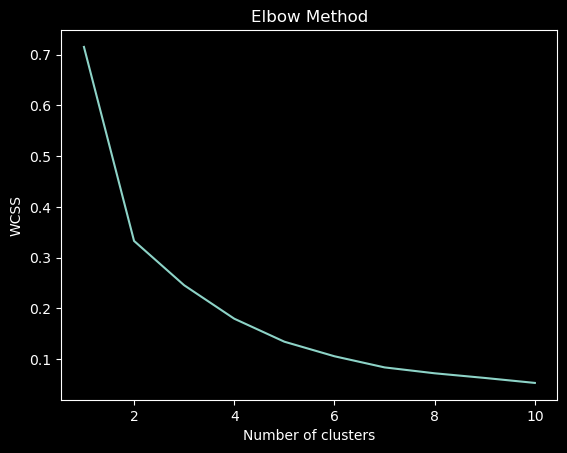

In [5]:
# Using the elbow method to find the optimal number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data[['latitude', 'longitude']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [6]:
# Finding the best number of clusters using the KneeLocator
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
kl.elbow


3

Since the best amount of k were 3. Im plotting it down below.

c:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


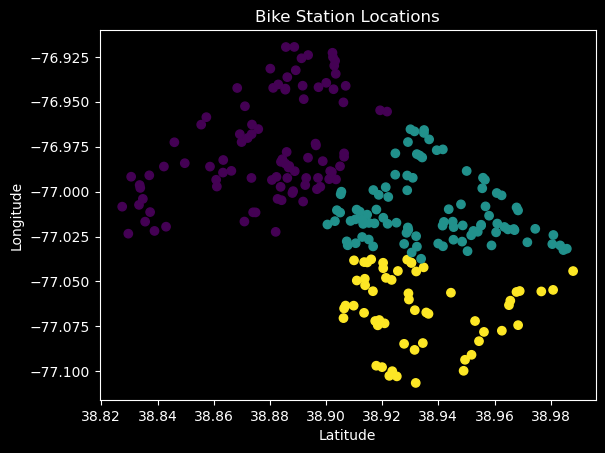

In [7]:
# Plotting the clusters with the optimal number of clusters
kmeans_model = KMeans(n_clusters=kl.elbow, random_state=1)
kmeans_model.fit(data[['latitude', 'longitude']])
data['cluster'] = kmeans_model.labels_

plt.scatter(data['latitude'], data['longitude'], c=data['cluster'], cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Bike Station Locations')
plt.show()


3. Apply Agglomerative clustering to the dataset. Draw the Dendrogram and use it to find the best (or a sensible) number of clusters.


In [8]:
# Applying agglomerative clustering to the data
minMaxScaler = MinMaxScaler()
X_scaled_mm = pd.DataFrame(minMaxScaler.fit_transform(X), columns=X.columns)


Building the agglomerative model

In [9]:
aggClustering = AgglomerativeClustering(n_clusters=3)
aggClustering.fit(X_scaled_mm)

AgglomerativeClustering(n_clusters=3)

In [10]:
data['3aggcluster'] = aggClustering.labels_
data['3aggcluster']

0      0
1      1
2      0
3      2
4      0
      ..
239    0
240    1
241    2
242    1
243    2
Name: 3aggcluster, Length: 244, dtype: int64

Drawing the Dendrogram

In [11]:
# Drawing the dendrogram
import scipy.cluster.hierarchy as sch

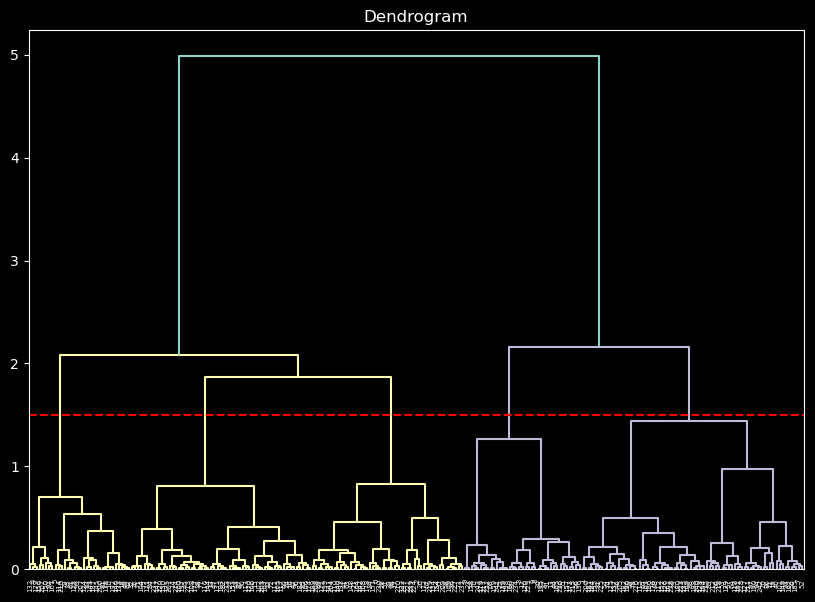

In [12]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dend = sch.dendrogram(sch.linkage(X_scaled_mm, method='ward'))

plt.axhline(y=1.5, color='r', linestyle='--')

plt.show()

4. Generate this number of clusters with Agglomerative clustering and visualize the clustering.


In [13]:
# applying agglomerative clustering with 5 clusters
aggClustering = AgglomerativeClustering(n_clusters=5)
aggClustering.fit(X_scaled_mm)

AgglomerativeClustering(n_clusters=5)

In [14]:
data['5aggcluster'] = aggClustering.labels_
data['5aggcluster']

0      1
1      0
2      1
3      2
4      3
      ..
239    1
240    0
241    2
242    0
243    2
Name: 5aggcluster, Length: 244, dtype: int64

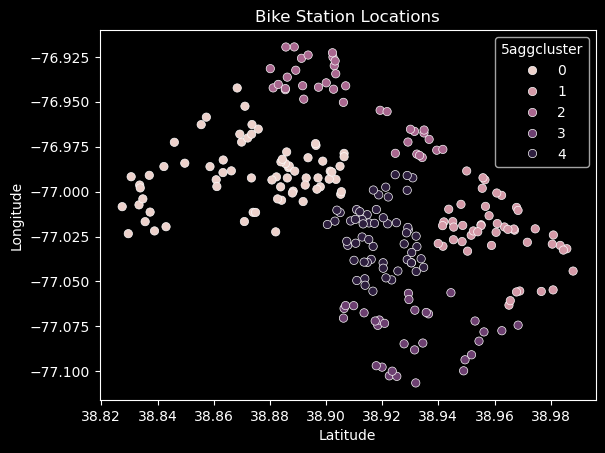

In [15]:
# Plotting the clusters
sns.scatterplot(data=data, x='latitude', y='longitude', hue='5aggcluster')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Bike Station Locations')
plt.show()

5. Apply DBSCAN clustering to the dataset. Try out different values for "eps" and "min_samples" and choose the best values. (Hint: For "eps" you probably have to try out values around 0.01.)


In [16]:
from sklearn.cluster import DBSCAN

# Create a DBSCAN model
dbscan = DBSCAN(eps=0.05, min_samples=2)
clusters = dbscan.fit_predict(data)
print("Cluster memberships:\n{}".format(clusters))


Cluster memberships:
[0 1 2 3 4 4 3 5 3 3 4 5 3 3 6 7 7 0 4 5 5 0 6 3 7 8 2 6 0 5 3 5 6 7 0 4 0
 3 6 0 5 0 7 6 3 6 5 7 5 4 5 0 5 5 5 3 3 5 0 5 7 4 4 0 5 5 5 0 8 0 8 6 6 0
 5 6 6 6 5 4 3 4 7 4 6 7 5 6 5 5 6 3 4 5 5 0 7 5 0 4 6 5 7 7 6 6 7 6 6 0 0
 6 5 6 4 5 6 6 5 8 3 6 2 4 4 5 5 5 5 5 6 6 4 4 0 5 3 5 4 8 0 0 0 4 6 4 4 6
 0 5 4 0 5 6 0 5 4 3 8 8 3 5 5 5 0 3 7 4 0 5 6 0 0 3 7 6 5 6 0 4 5 5 5 7 5
 5 5 4 5 0 5 5 4 0 5 3 5 6 8 0 4 6 4 7 0 5 1 4 0 0 0 5 5 6 6 3 4 8 5 0 6 2
 8 5 2 5 5 0 5 3 0 6 0 7 3 5 3 2 5 2 5 8 5 8]


Lets try with different values for esp and minSamples

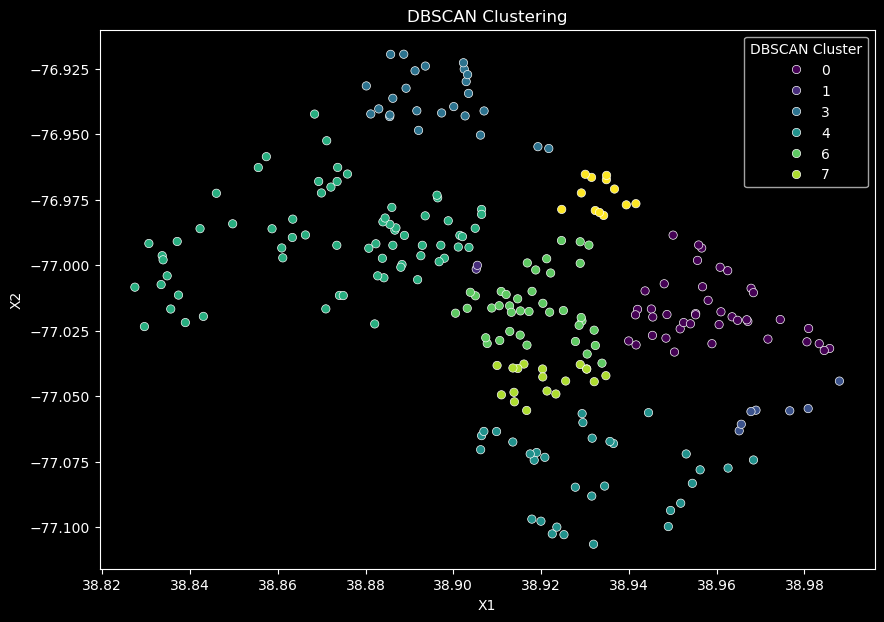

In [ ]:
Data = pd.DataFrame({"X1": data['latitude'], "X2": data['longitude']})
Data["DBSCAN Cluster"] = clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(data=Data, x="X1", y="X2", hue="DBSCAN Cluster", palette="viridis")
plt.title("DBSCAN Clustering")
plt.show()

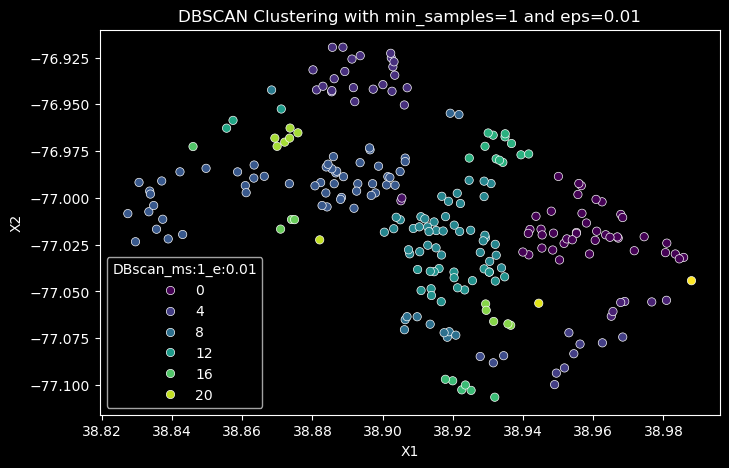

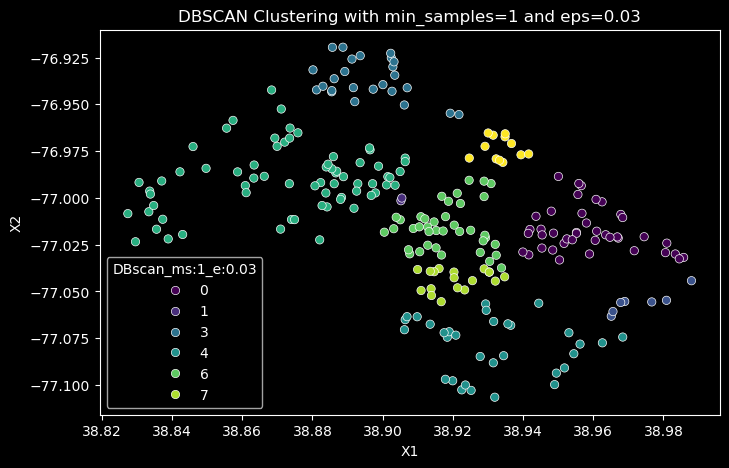

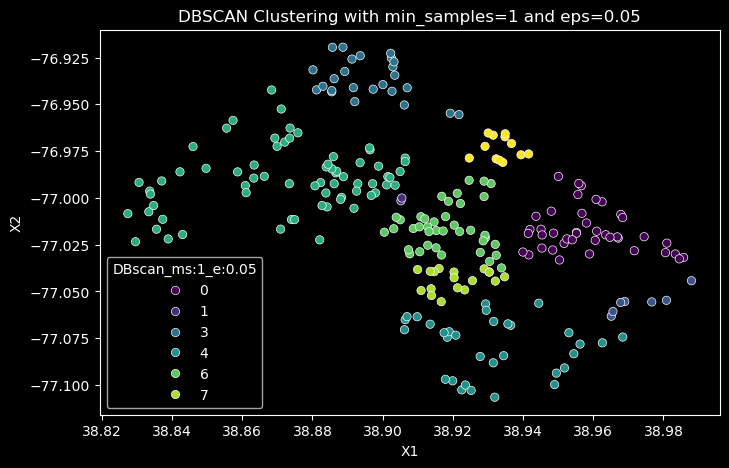

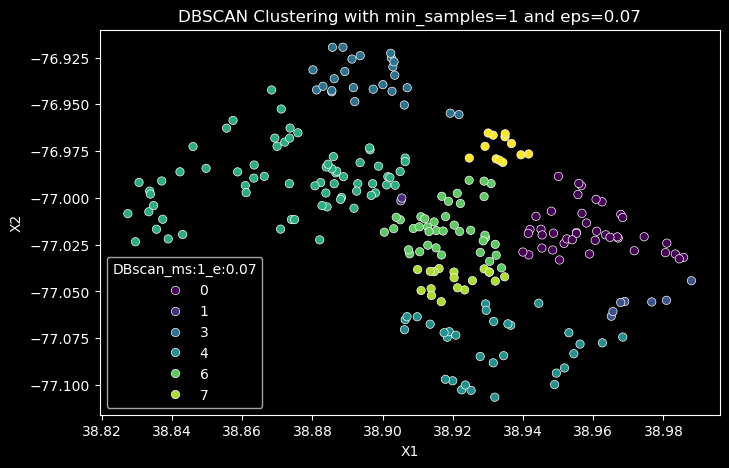

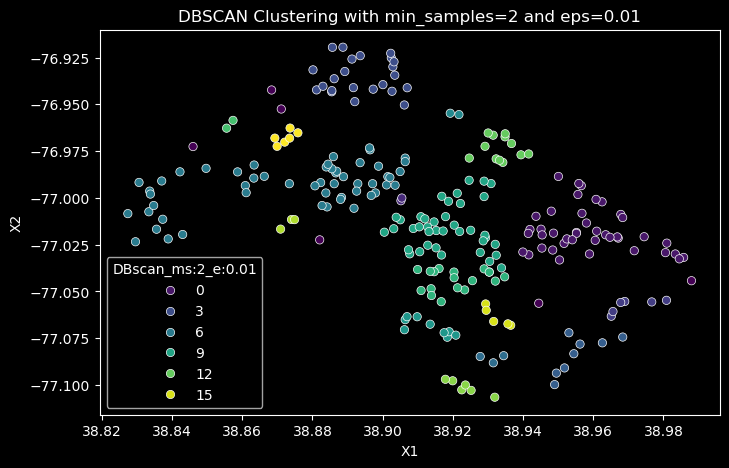

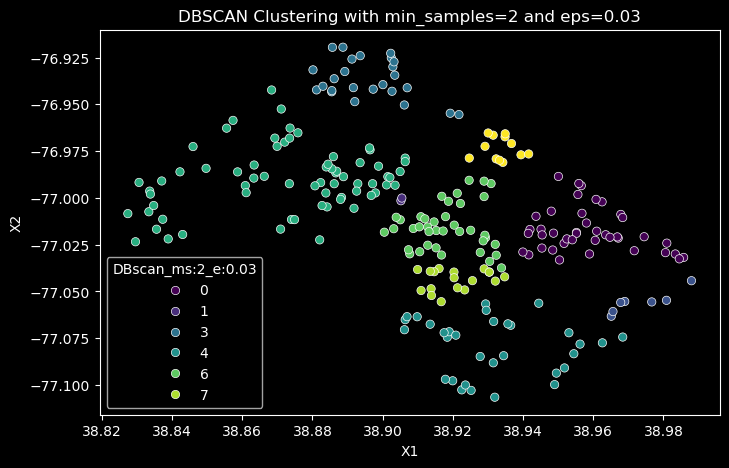

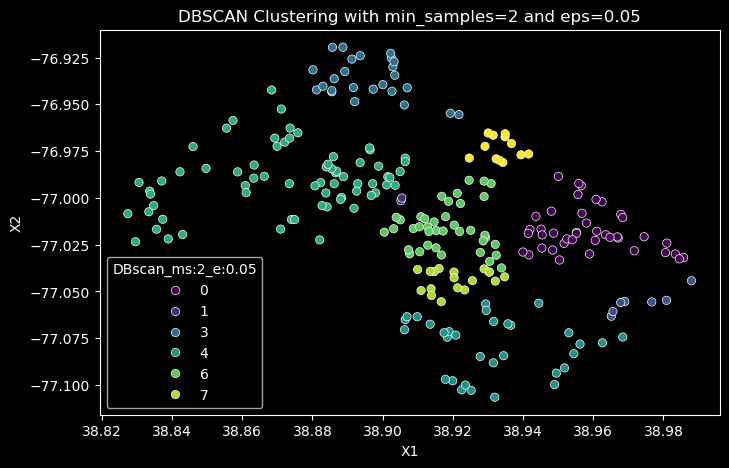

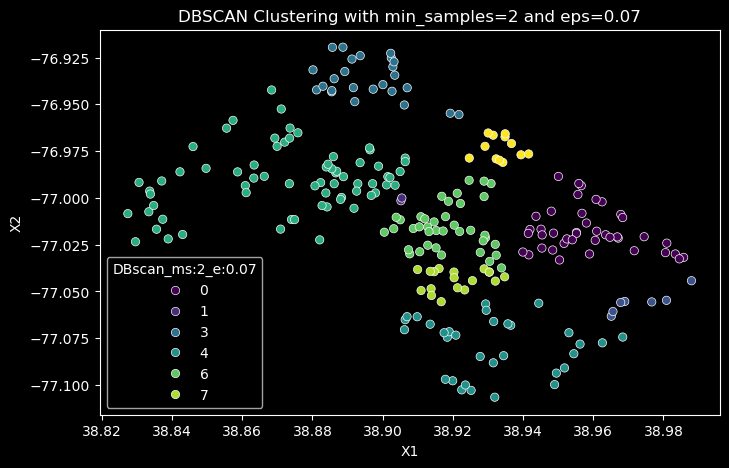

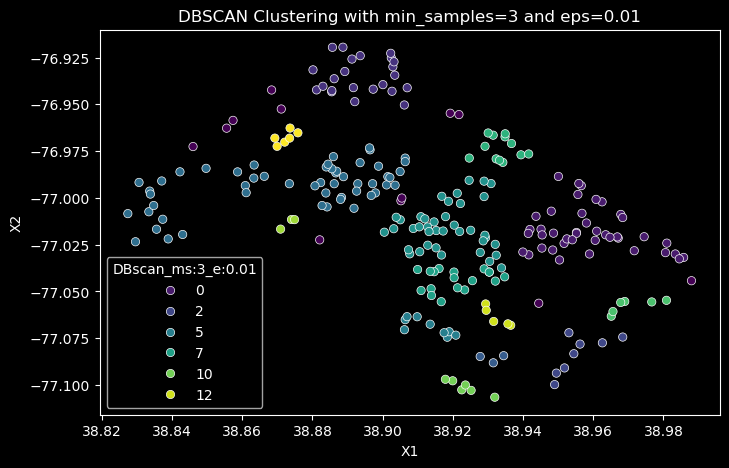

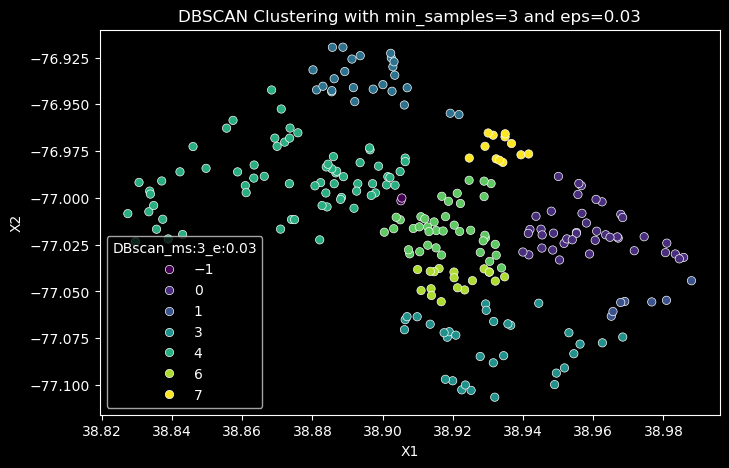

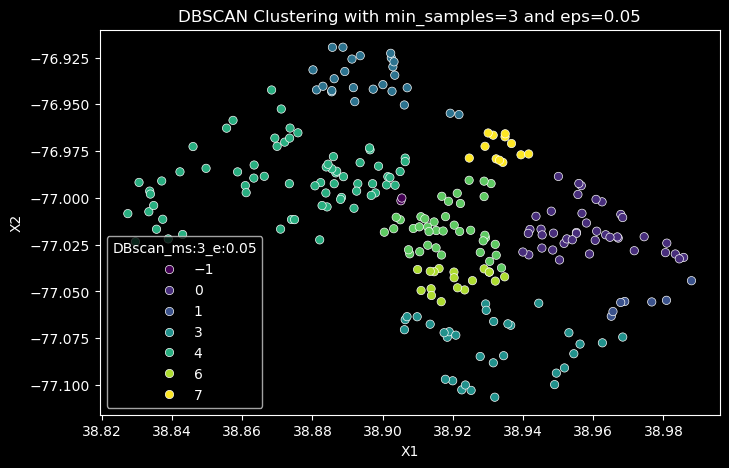

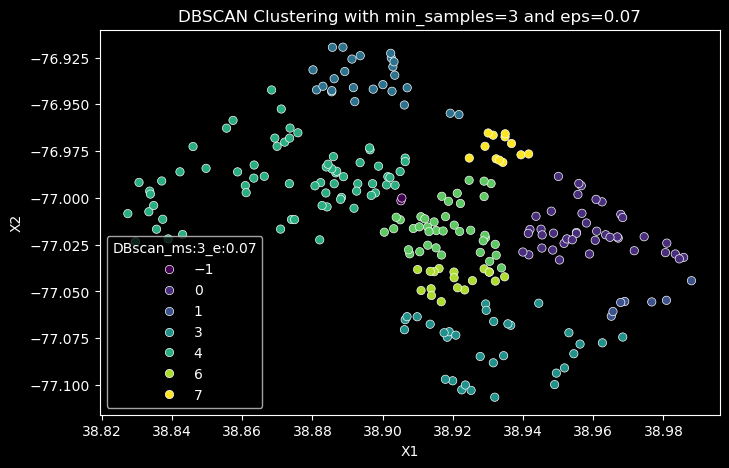

In [18]:
minSamples = [1, 2, 3]
eps = [0.01, 0.03, 0.05, 0.07]

for ms in minSamples:
    for e in eps:
        dbscan = DBSCAN(eps=e, min_samples=ms)
        clusters = dbscan.fit_predict(data)
        Data["DBscan_ms:{0}_e:{1}".format(ms, e)] = dbscan.labels_
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=Data, x="X1", y="X2", hue="DBscan_ms:{0}_e:{1}".format(ms, e), palette="viridis")
        plt.title("DBSCAN Clustering with min_samples={0} and eps={1}".format(ms, e))
        plt.show()
plt.show()

6. Visual the final DBSCAN clustering you decided upon in 5.


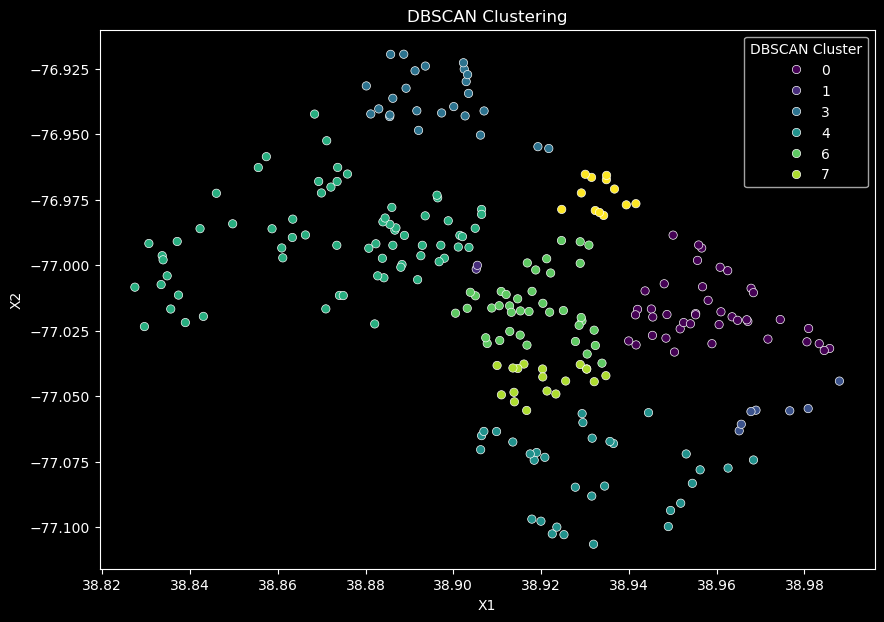

In [34]:
#Visualizing the DBSCAN clustering with 2 min_samples and 0.05 eps
dbscan = DBSCAN(eps=0.05, min_samples=2)
Data["DBSCAN Cluster"] = dbscan.fit_predict(data)
plt.figure(figsize=(10, 7))
sns.scatterplot(data=Data, x="X1", y="X2", hue="DBSCAN Cluster", palette="viridis")
plt.title("DBSCAN Clustering")
plt.show()

7. Calculate the Silhouette scores for the three different "best clustering" you found with the three different methods. Also use Adjusted Rand Index to compare the best ones to each other.

In [28]:
#Calculating the silhouette score for the three clustering methods
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

In [29]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data[['latitude', 'longitude']])
X_scaled = scaler.transform(data[['latitude', 'longitude']])

In [35]:
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(X_scaled)
aggClustering = AgglomerativeClustering(n_clusters=3)
clusters = aggClustering.fit_predict(X_scaled)
dbscan = DBSCAN(eps=0.05, min_samples=2)
clusters = dbscan.fit_predict(X_scaled)

c:\Users\victo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
Data = pd.DataFrame({"X1": data['latitude'], "X2": data['longitude']})
Data["Ground Truth"] = data['cluster']
Data["KMeans Cluster"] = kmeans_model.labels_
Data["Agglomerative Cluster"] = aggClustering.labels_
Data["DBSCAN Cluster"] = clusters


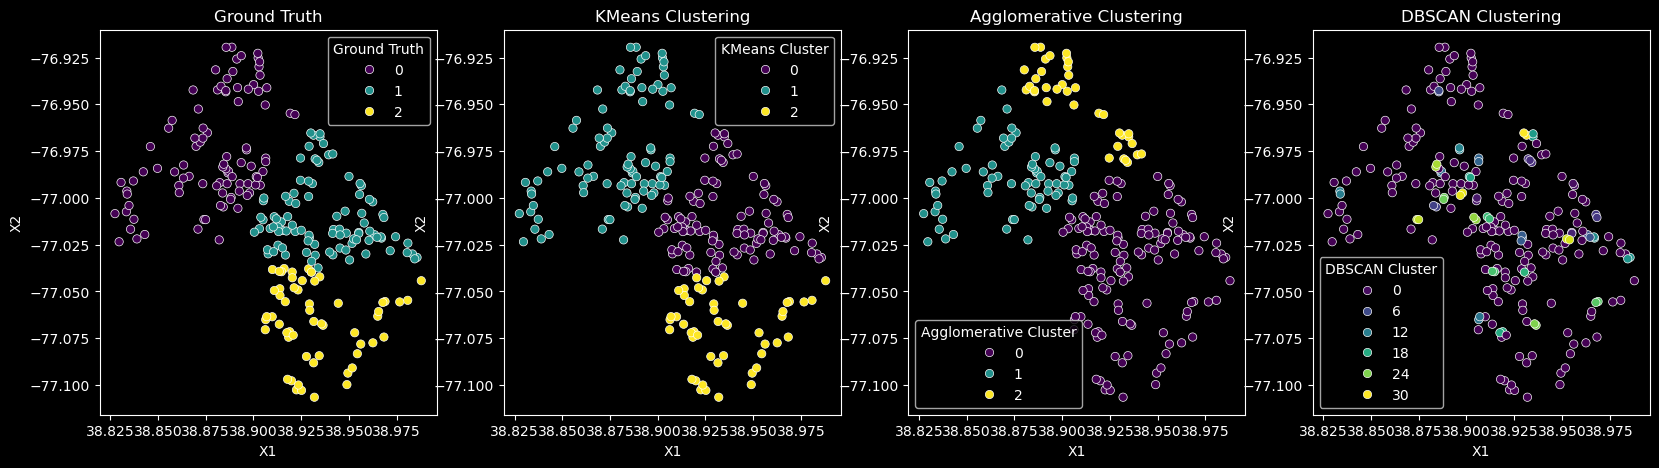

In [37]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
sns.scatterplot(data=Data, x="X1", y="X2", hue="Ground Truth", palette="viridis", ax=axes[0])
sns.scatterplot(data=Data, x="X1", y="X2", hue="KMeans Cluster", palette="viridis", ax=axes[1])
sns.scatterplot(data=Data, x="X1", y="X2", hue="Agglomerative Cluster", palette="viridis", ax=axes[2])
sns.scatterplot(data=Data, x="X1", y="X2", hue="DBSCAN Cluster", palette="viridis", ax=axes[3])
axes[0].set_title("Ground Truth")
axes[1].set_title("KMeans Clustering")
axes[2].set_title("Agglomerative Clustering")
axes[3].set_title("DBSCAN Clustering")
plt.show()

### Adjusted Rand Index

In [38]:
ARI_df = pd.DataFrame({"Clustering method": ["KMeans", "Agglomerative", "DBSCAN"],
                       "Comparative clusstering method": ["Ground Truth", "Ground Truth", "Agglomerative"],
                       "ARI": [adjusted_rand_score(Data["Ground Truth"], Data["KMeans Cluster"]),
                               adjusted_rand_score(Data["Ground Truth"], Data["Agglomerative Cluster"]),
                               adjusted_rand_score(Data["Agglomerative Cluster"], Data["DBSCAN Cluster"])]})
ARI_df

,Clustering method,Comparative clusstering method,ARI
0,KMeans,Ground Truth,0.915386
1,Agglomerative,Ground Truth,0.442934
2,DBSCAN,Agglomerative,0.019373


Silhouette Score

In [39]:
SilScore_df = pd.DataFrame({"Clustering method": ["KMeans", "Agglomerative", "DBSCAN"], 
                       "Silhouette Score": [silhouette_score(X=X_scaled, labels=Data["KMeans Cluster"]),
                                            silhouette_score(X=X_scaled, labels=Data["Agglomerative Cluster"]),
                                            silhouette_score(X=X_scaled, labels=Data["DBSCAN Cluster"])]})
SilScore_df

,Clustering method,Silhouette Score
0,KMeans,0.374596
1,Agglomerative,0.414982
2,DBSCAN,-0.392185


In [40]:
unique_clusters = np.unique(Data["DBSCAN Cluster"])
print("Number of unique clusters: ", unique_clusters)

Number of unique clusters:  [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30]
